In [1]:
from sklearn import datasets
iris = datasets.load_iris()

In [2]:
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [3]:
import pandas as pd
data=pd.DataFrame({
    'sepal length':iris.data[:,0],
    'sepal width':iris.data[:,1],
    'petal length':iris.data[:,2],
    'petal width':iris.data[:,3],
    'species':iris.target
})
data.head()

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [4]:
from sklearn.model_selection import train_test_split

X=data[['sepal length', 'sepal width', 'petal length', 'petal width']]  
y=data['species'] 

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) 

In [5]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=2000,max_depth = 2)

clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [6]:
feature_imp = pd.Series(clf.feature_importances_,index=iris.feature_names).sort_values(ascending=False)
feature_imp


petal width (cm)     0.470509
petal length (cm)    0.418336
sepal length (cm)    0.103166
sepal width (cm)     0.007989
dtype: float64

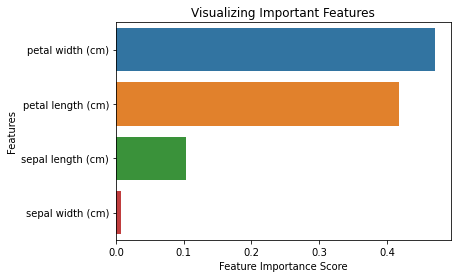

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

#### petal length has the most importance amongst all four.

In [22]:
from sklearn import metrics
print("Accuracy for Random Forest Classifier model is",metrics.accuracy_score(y_test, y_pred)*100)

Accuracy for Random Forest Classifier model is 97.77777777777777


The accuracy improved can be improved further once the least significant characteristics is removed (sepal width). This is due to the fact that you eliminate false data and noise, resulting in greater accuracy. Training time is cut in half when there are fewer features.

In [9]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

In [18]:
gb =GradientBoostingClassifier(n_estimators=500,max_depth = 3,learning_rate= 0.01)

#Train the model using the training sets y_pred=clf.predict(X_test)
gb.fit(X_train,y_train)

y_pred=gb.predict(X_test)

In [14]:
feature_imp = pd.Series(gb.feature_importances_,index=iris.feature_names).sort_values(ascending=False)
feature_imp

petal width (cm)     0.691332
petal length (cm)    0.277935
sepal length (cm)    0.015782
sepal width (cm)     0.014951
dtype: float64

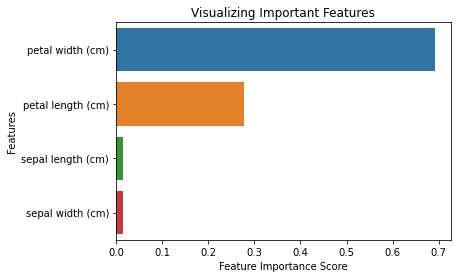

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")

plt.show()

In [20]:
print("Accuracy for Gradient boosting classifier model is",metrics.accuracy_score(y_test, y_pred)*100)

Accuracy for Gradient boosting classifier model is 97.77777777777777


Gradient boosting, like random forests, is a collection of decision trees. The following are the two primary distinctions:
Random forests construct each tree individually, whereas gradient boosting constructs one tree at a time. This additive model (ensemble) works in a stage-by-stage way, introducing a weak learner to help existing weak learners develop.

Random forests combine outcomes at the end of the process (through averaging or "majority rules"), whereas gradient boosting combines findings as they are generated.

Gradient boosting has the potential to outperform random forests if parameters are appropriately tuned. Gradient boosting, on the other hand, may not be a smart choice if there is a lot of noise, since it might lead to overfitting. They're also more difficult to modify than random forests.

In different ways, random forests and gradient boosting are superior. Random forests are particularly good in detecting multi-class objects and bioinformatics, both of which have a lot of statistical noise. When you have uneven data, such as in real-time risk assessment, gradient boosting works effectively.